In [ ]:
!unzip '/content/Test_data.zip'

Archive:  /content/Test_data.zip
   creating: Test Data/
   creating: Test Data/Brain Tumour/
  inflating: Test Data/Brain Tumour/Cancer (1501).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1502).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1503).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1504).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1505).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1506).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1507).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1508).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1509).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1510).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1511).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1512).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1513).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1514).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1515).jpg  
  inflating: Test Data/Brain Tumour/Cancer (1516).jpg  
  inflatin

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_data = ImageDataGenerator(rescale=(1./255))

In [ ]:
trainset = train_data.flow_from_directory('/content/Training Data',target_size=(120, 120),class_mode='categorical', batch_size=8)
testset = test_data.flow_from_directory('/content/Test Data',target_size=(120, 120),class_mode='categorical', batch_size=8)

Found 900 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


In [ ]:
trainset.class_indices

{'Brain Tumour': 0, 'Breast Cancer': 1, 'Healthy': 2, 'Lung Cancer': 3}

In [ ]:
testset.class_indices

{'Brain Tumour': 0, 'Breast Cancer': 1, 'Healthy': 2, 'Lung Cancer': 3}

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(trainset,batch_size=8,validation_data=testset,epochs=10)

Epoch 1/10
113/113 [==============================] - 21s 174ms/step - loss: 0.1718 - accuracy: 0.9378 - val_loss: 0.0361 - val_accuracy: 0.9935
Epoch 2/10
113/113 [==============================] - 20s 172ms/step - loss: 7.7955e-04 - accuracy: 1.0000 - val_loss: 0.0382 - val_accuracy: 0.9903
Epoch 3/10
113/113 [==============================] - 20s 172ms/step - loss: 7.2417e-04 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9903
Epoch 4/10
113/113 [==============================] - 20s 172ms/step - loss: 1.4151e-04 - accuracy: 1.0000 - val_loss: 0.0673 - val_accuracy: 0.9871
Epoch 5/10
113/113 [==============================] - 20s 173ms/step - loss: 7.5618e-05 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9903
Epoch 6/10
113/113 [==============================] - 22s 192ms/step - loss: 5.4880e-05 - accuracy: 1.0000 - val_loss: 0.0668 - val_accuracy: 0.9903
Epoch 7/10
113/113 [==============================] - 19s 170ms/step - loss: 3.7336e-05 - accuracy: 1.0000 - v

In [ ]:
model.save('TARPCNN.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
imgone = image.load_img('/content/Test Data/Lung Cancer/lungscc4002_2_11zon.jpg',target_size=(120,120))
imgone = image.img_to_array(imgone)
imgone = np.expand_dims(imgone,axis=0)
dataone = np.argmax(model.predict(imgone))
print(dataone)
finaloutput = ['Brain Tumour', 'Breast Cancer', 'Healthy', 'Lung Cancer']
print(finaloutput[dataone])

1/1 [==============================] - 0s 124ms/step
3
Lung Cancer


In [ ]:
imgtwo = image.load_img('/content/Test Data/Breast Cancer/malignant (152).jpg',target_size=(120,120))
imgtwo = image.img_to_array(imgtwo)
imgtwo = np.expand_dims(imgtwo,axis=0)
datatwo = np.argmax(model.predict(imgtwo))
print(datatwo)
finaloutput = ['Brain Tumour', 'Breast Cancer', 'Healthy', 'Lung Cancer']
print(finaloutput[datatwo])

1/1 [==============================] - 0s 26ms/step
1
Breast Cancer


In [ ]:
imgthree = image.load_img('/content/Test Data/Healthy/aug_35 no_0_2448.jpg',target_size=(120,120))
imgthree = image.img_to_array(imgthree)
imgthree = np.expand_dims(imgthree,axis=0)
datathree = np.argmax(model.predict(imgthree))
print(datathree)
finaloutput = ['Brain Tumour', 'Breast Cancer', 'Healthy', 'Lung Cancer']
print(finaloutput[datathree])

1/1 [==============================] - 0s 26ms/step
2
Healthy


In [ ]:
imgfour = image.load_img('/content/Test Data/Brain Tumour/Cancer (1505).jpg',target_size=(120,120))
imgfour = image.img_to_array(imgfour)
imgfour = np.expand_dims(imgfour,axis=0)
datafour = np.argmax(model.predict(imgfour))
print(datafour)
finaloutput = ['Brain Tumour', 'Breast Cancer', 'Healthy', 'Lung Cancer']
print(finaloutput[datafour])

1/1 [==============================] - 0s 26ms/step
0
Brain Tumour


In [ ]:
history = model.fit(trainset,batch_size=8,validation_data=testset,epochs=2)

Epoch 1/2
113/113 [==============================] - 7s 66ms/step - loss: 3.1522e-04 - accuracy: 1.0000 - val_loss: 0.1623 - val_accuracy: 0.9579
Epoch 2/2
113/113 [==============================] - 5s 47ms/step - loss: 1.2315e-04 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9709


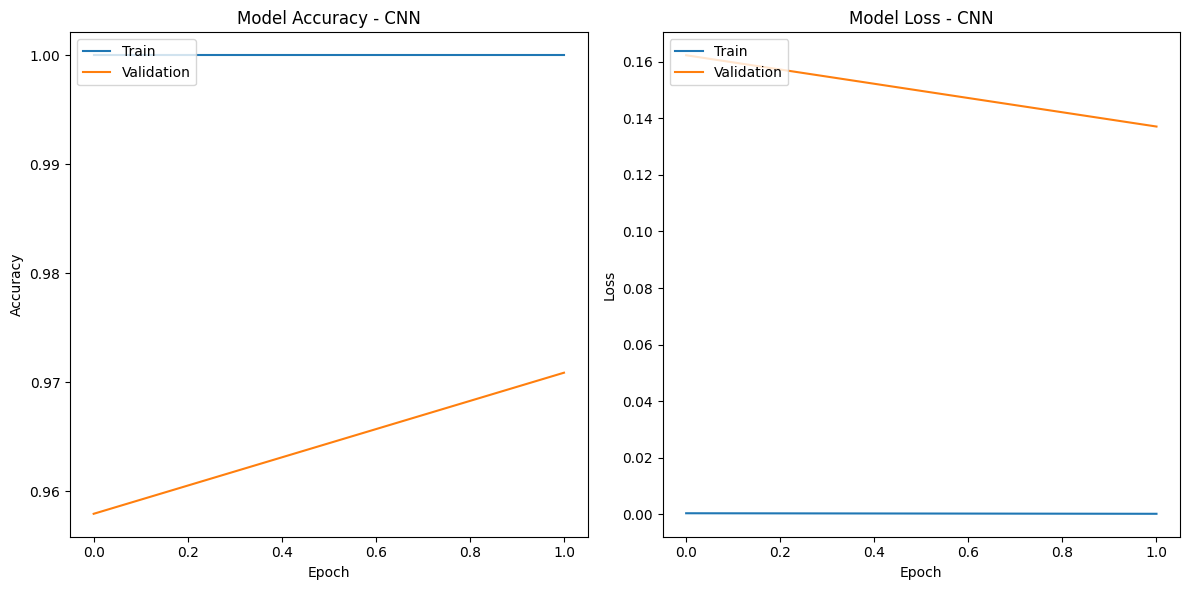

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, title):

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy - ' + title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')


    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss - ' + title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


plot_training_history(history, 'CNN')


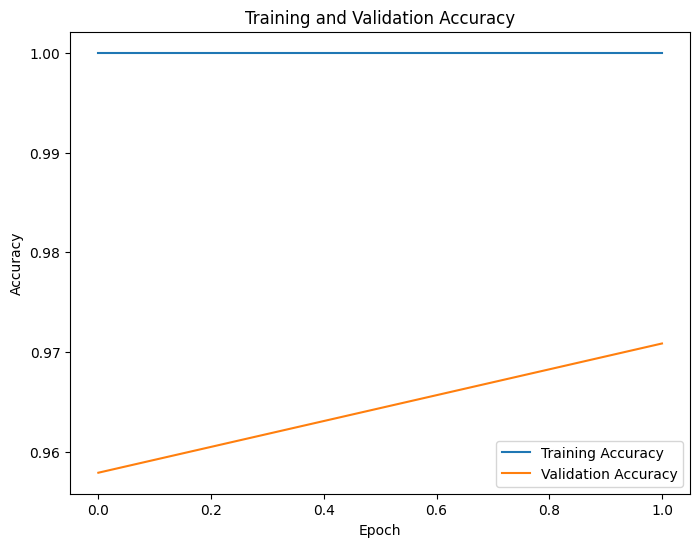

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [ ]:
modelone = Sequential()
modelone.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
modelone.add(MaxPooling2D(pool_size=(2,2)))
modelone.add(Convolution2D(24,(3,3),activation='relu'))
modelone.add(MaxPooling2D(pool_size=(2,2)))
modelone.add(Convolution2D(36,(3,3),activation='relu'))
modelone.add(MaxPooling2D(pool_size=(2,2)))
modelone.add(Flatten())
modelone.add(Dense(62,activation='relu'))
modelone.add(Dense(32,activation='relu'))
modelone.add(Dense(16,activation='relu'))
modelone.add(Dense(4,activation='softmax'))

In [ ]:
modelone.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 118, 118, 12)      336       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 59, 59, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 57, 57, 24)        2616      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 28, 28, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 36)        7812      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 36)       

In [ ]:
modelone.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
modelone.fit(trainset,batch_size=8,validation_data=testset,epochs=10)

Epoch 1/10
113/113 [==============================] - 8s 55ms/step - loss: 0.4556 - accuracy: 0.8156 - val_loss: 0.8838 - val_accuracy: 0.7508
Epoch 2/10
113/113 [==============================] - 5s 46ms/step - loss: 0.0450 - accuracy: 0.9867 - val_loss: 0.1002 - val_accuracy: 0.9676
Epoch 3/10
113/113 [==============================] - 7s 61ms/step - loss: 0.0044 - accuracy: 0.9978 - val_loss: 0.4484 - val_accuracy: 0.9223
Epoch 4/10
113/113 [==============================] - 5s 47ms/step - loss: 4.3553e-04 - accuracy: 1.0000 - val_loss: 0.3116 - val_accuracy: 0.9515
Epoch 5/10
113/113 [==============================] - 7s 63ms/step - loss: 1.5725e-04 - accuracy: 1.0000 - val_loss: 0.6356 - val_accuracy: 0.8641
Epoch 6/10
113/113 [==============================] - 5s 46ms/step - loss: 1.2876e-04 - accuracy: 1.0000 - val_loss: 0.3812 - val_accuracy: 0.9385
Epoch 7/10
113/113 [==============================] - 7s 62ms/step - loss: 6.3020e-05 - accuracy: 1.0000 - val_loss: 0.4124 - val_

In [ ]:
imgfour = image.load_img('/content/Test Data/Healthy/aug_35 no_0_3748.jpg',target_size=(120,120))
imgfour = image.img_to_array(imgfour)
imgfour = np.expand_dims(imgfour,axis=0)
datafour = np.argmax(modelone.predict(imgfour))
print(datafour)
finaloutput = ['Brain Tumour', 'Breast Cancer', 'Healthy', 'Lung Cancer']
print(finaloutput[datafour])

1/1 [==============================] - 0s 165ms/step
2
Healthy


In [ ]:
history = modelone.fit(trainset,batch_size=8,validation_data=testset,epochs=2)

Epoch 1/2
113/113 [==============================] - 5s 47ms/step - loss: 1.2138e-05 - accuracy: 1.0000 - val_loss: 0.3024 - val_accuracy: 0.9482
Epoch 2/2
113/113 [==============================] - 6s 57ms/step - loss: 1.0810e-05 - accuracy: 1.0000 - val_loss: 0.2696 - val_accuracy: 0.9547


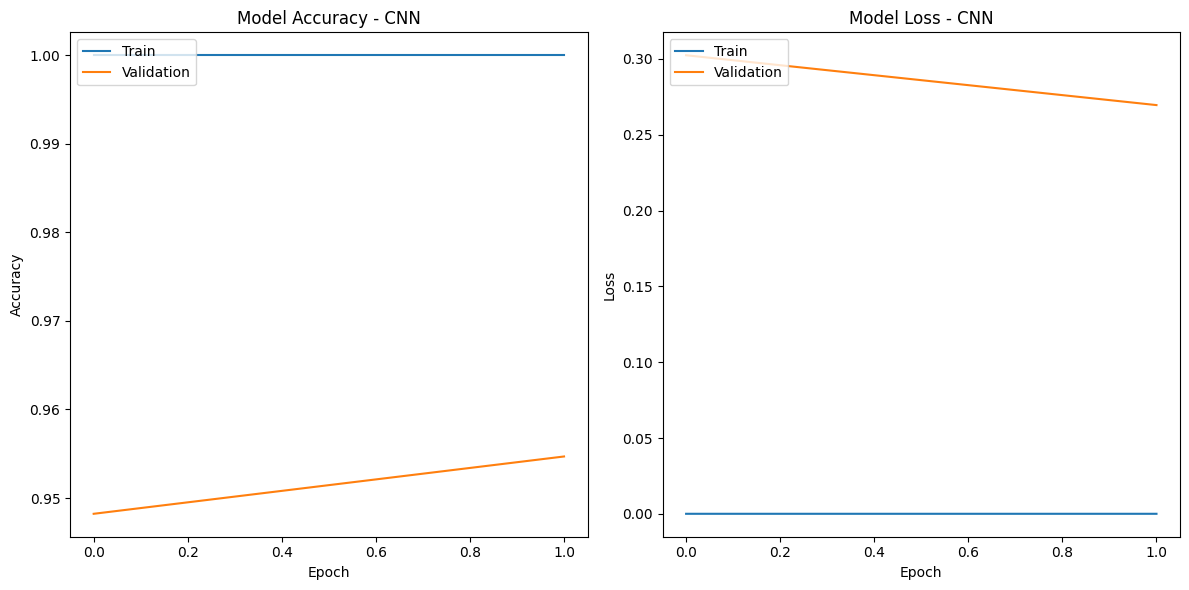

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, title):

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy - ' + title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')


    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss - ' + title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


plot_training_history(history, 'CNN')

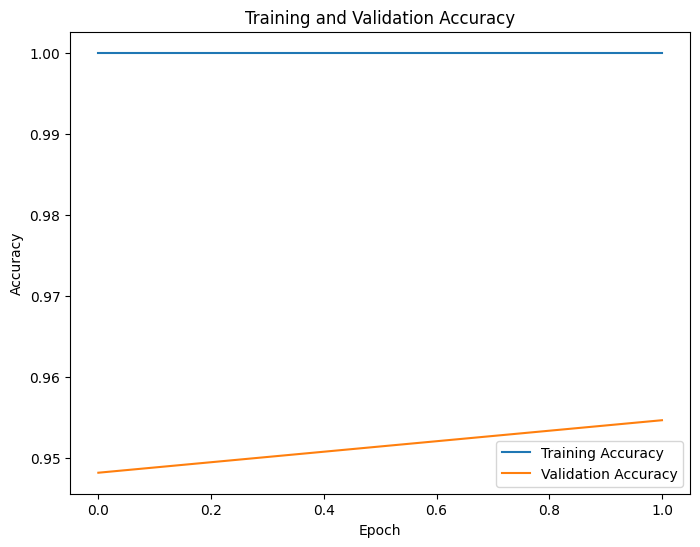

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
modelthree = Sequential()
modelthree.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
modelthree.add(BatchNormalization())
modelthree.add(MaxPooling2D(pool_size=(2,2)))
modelthree.add(Dropout(0.2))
modelthree.add(Convolution2D(24,(3,3),activation='relu'))
modelthree.add(BatchNormalization())
modelthree.add(MaxPooling2D(pool_size=(2,2)))
modelthree.add(Dropout(0.2))
modelthree.add(Convolution2D(36,(3,3),activation='relu'))
modelthree.add(BatchNormalization())
modelthree.add(MaxPooling2D(pool_size=(2,2)))
modelthree.add(Dropout(0.2))
modelthree.add(Flatten())
modelthree.add(Dense(62,activation='relu'))
modelthree.add(BatchNormalization())
modelthree.add(Dropout(0.1))
modelthree.add(Dense(32,activation='relu'))
modelthree.add(Dense(16,activation='relu'))
modelthree.add(Dense(4,activation='softmax'))

In [ ]:
modelthree.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 12)      336       
                                                                 
 batch_normalization (Batch  (None, 118, 118, 12)      48        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 12)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 59, 59, 12)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 24)        2616      
                                                                 
 batch_normalization_1 (Bat  (None, 57, 57, 24)        9

In [ ]:
modelthree.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystop = EarlyStopping(monitor='accuracy',patience=8)

In [ ]:
modelthree.fit(trainset,batch_size=8,validation_data=testset,epochs=15,callbacks=earlystop)

Epoch 1/15
113/113 [==============================] - 6s 49ms/step - loss: 0.0513 - accuracy: 0.9856 - val_loss: 0.1134 - val_accuracy: 0.9579
Epoch 2/15
113/113 [==============================] - 7s 60ms/step - loss: 0.0083 - accuracy: 0.9967 - val_loss: 0.5415 - val_accuracy: 0.8447
Epoch 3/15
113/113 [==============================] - 6s 51ms/step - loss: 0.0141 - accuracy: 0.9967 - val_loss: 0.3673 - val_accuracy: 0.8641
Epoch 4/15
113/113 [==============================] - 7s 64ms/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 1.3903 - val_accuracy: 0.7055
Epoch 5/15
113/113 [==============================] - 6s 52ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.0842 - val_accuracy: 0.7573
Epoch 6/15
113/113 [==============================] - 7s 58ms/step - loss: 0.0186 - accuracy: 0.9944 - val_loss: 0.0835 - val_accuracy: 0.9773
Epoch 7/15
113/113 [==============================] - 8s 70ms/step - loss: 0.0280 - accuracy: 0.9933 - val_loss: 0.2732 - val_accuracy: 0.9320

In [ ]:
imgfour = image.load_img('/content/Test Data/Lung Cancer/lungscc4003_3_11zon.jpg',target_size=(120,120))
imgfour = image.img_to_array(imgfour)
imgfour = np.expand_dims(imgfour,axis=0)
datafour = np.argmax(modelthree.predict(imgfour))
print(datafour)
finaloutput = ['Brain Tumour', 'Breast Cancer', 'Healthy', 'Lung Cancer']
print(finaloutput[datafour])

1/1 [==============================] - 0s 129ms/step
3
Lung Cancer


In [ ]:
# VGG16

In [ ]:
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np

In [ ]:
train_path_one = "/content/Training Data"
test_path_one = "/content/Test Data"

In [ ]:
train_generators = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_generators = ImageDataGenerator(rescale=1./255)

In [ ]:
trainvalue = train_generators.flow_from_directory(train_path_one,target_size=(224,224),batch_size=22,class_mode='categorical')
testvalue = test_generators.flow_from_directory(test_path_one,target_size=(224,224),batch_size=22,class_mode='categorical')

Found 900 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
vgg = VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  print(layer)

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(4,activation='softmax')(x)

In [ ]:
modelfour = Model(inputs=vgg.input,outputs=prediction)

In [ ]:
modelfour.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
modelfour.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
modelfour.fit_generator(trainvalue,validation_data=testvalue,epochs=1,steps_per_epoch=len(trainvalue),validation_steps=len(testvalue))

<ipython-input-61-b862f1423da9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  modelfour.fit_generator(trainvalue,validation_data=testvalue,epochs=1,steps_per_epoch=len(trainvalue),validation_steps=len(testvalue))


41/41 [==============================] - 817s 20s/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 3.0276 - val_accuracy: 0.6764


In [ ]:
modelfour.fit(trainvalue,batch_size=8,validation_data=testvalue,epochs=10)

Epoch 1/10
41/41 [==============================] - 21s 425ms/step - loss: 0.2324 - accuracy: 0.9111 - val_loss: 2.5920 - val_accuracy: 0.6764
Epoch 2/10
41/41 [==============================] - 15s 368ms/step - loss: 0.0186 - accuracy: 0.9956 - val_loss: 3.2951 - val_accuracy: 0.6764
Epoch 3/10
41/41 [==============================] - 15s 375ms/step - loss: 0.0102 - accuracy: 0.9978 - val_loss: 2.2055 - val_accuracy: 0.6667
Epoch 4/10
41/41 [==============================] - 16s 389ms/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 2.1590 - val_accuracy: 0.6731
Epoch 5/10
41/41 [==============================] - 15s 370ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 2.5881 - val_accuracy: 0.6731
Epoch 6/10
41/41 [==============================] - 14s 352ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 3.1074 - val_accuracy: 0.6764
Epoch 7/10
41/41 [==============================] - 15s 359ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.9506 - val_accuracy: 0.6731

In [ ]:
imgfour = image.load_img('/content/Test Data/Healthy/aug_35 no_0_5923.jpg',target_size=(224,224))
imgfour = image.img_to_array(imgfour)
imgfour = np.expand_dims(imgfour,axis=0)
datafour = np.argmax(modelfour.predict(imgfour))
print(datafour)
finaloutput = ['Brain Tumour', 'Breast Cancer', 'Healthy', 'Lung Cancer']
print(finaloutput[datafour])

1/1 [==============================] - 0s 30ms/step
2
Healthy


In [ ]:
#ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet = ResNet50(include_top=False,input_shape=(224,224,3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
  layer.trainable=False

In [ ]:
for layer in resnet.layers:
  print(layer)

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
out = Dense(4, activation='softmax')(x)

In [ ]:
res_model = Model(inputs=resnet.input,outputs=out)

In [ ]:
res_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
res_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
res_model.fit(trainvalue,epochs=10,validation_data=testvalue,steps_per_epoch=len(trainvalue),validation_steps=len(testvalue))

Epoch 1/10
41/41 [==============================] - 19s 378ms/step - loss: 3.6405 - accuracy: 0.4800 - val_loss: 6.9713 - val_accuracy: 0.5793
Epoch 2/10
41/41 [==============================] - 14s 350ms/step - loss: 0.5956 - accuracy: 0.7967 - val_loss: 8.0208 - val_accuracy: 0.5793
Epoch 3/10
41/41 [==============================] - 14s 349ms/step - loss: 0.6135 - accuracy: 0.8000 - val_loss: 9.6334 - val_accuracy: 0.5663
Epoch 4/10
41/41 [==============================] - 14s 352ms/step - loss: 0.2748 - accuracy: 0.8911 - val_loss: 10.6736 - val_accuracy: 0.6278
Epoch 5/10
41/41 [==============================] - 15s 357ms/step - loss: 0.1724 - accuracy: 0.9367 - val_loss: 11.0112 - val_accuracy: 0.6408
Epoch 6/10
41/41 [==============================] - 15s 362ms/step - loss: 0.2392 - accuracy: 0.9167 - val_loss: 12.3503 - val_accuracy: 0.5405
Epoch 7/10
41/41 [==============================] - 14s 350ms/step - loss: 0.2134 - accuracy: 0.9222 - val_loss: 11.2235 - val_accuracy: 0.

In [ ]:
imgfour = image.load_img('/content/Test Data/Healthy/aug_36 no_0_8486.jpg',target_size=(224,224))
imgfour = image.img_to_array(imgfour)
imgfour = np.expand_dims(imgfour,axis=0)
datafour = np.argmax(res_model.predict(imgfour))
print(datafour)
finaloutput = ['Brain Tumour', 'Breast Cancer', 'Healthy', 'Lung Cancer']
print(finaloutput[datafour])

1/1 [==============================] - 0s 26ms/step
2
Healthy


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
for layer in base_model.layers:
  print(layer)

In [ ]:
x = GlobalAveragePooling2D()(base_model.output)

In [ ]:
x = GlobalAveragePooling2D()(base_model.output)

In [ ]:
output = Dense(4,activation='softmax')(x)

In [ ]:
model_i = Model(inputs=base_model.input, outputs=output)

In [ ]:
model_i.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_4 (Bat  (None, 111, 111, 32)         96        ['conv2d_6[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization_4[

In [ ]:
model_i.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_i.fit(trainvalue,epochs=10,validation_data=testvalue,steps_per_epoch=len(trainvalue),validation_steps=len(testvalue))

Epoch 1/10
41/41 [==============================] - 23s 398ms/step - loss: 0.3401 - accuracy: 0.8889 - val_loss: 0.7561 - val_accuracy: 0.7087
Epoch 2/10
41/41 [==============================] - 15s 357ms/step - loss: 0.0603 - accuracy: 0.9867 - val_loss: 0.5609 - val_accuracy: 0.7896
Epoch 3/10
41/41 [==============================] - 15s 368ms/step - loss: 0.0410 - accuracy: 0.9911 - val_loss: 0.6067 - val_accuracy: 0.7832
Epoch 4/10
41/41 [==============================] - 14s 343ms/step - loss: 0.0303 - accuracy: 0.9944 - val_loss: 0.6996 - val_accuracy: 0.7735
Epoch 5/10
41/41 [==============================] - 14s 345ms/step - loss: 0.0244 - accuracy: 0.9956 - val_loss: 0.6284 - val_accuracy: 0.7735
Epoch 6/10
41/41 [==============================] - 14s 350ms/step - loss: 0.0241 - accuracy: 0.9956 - val_loss: 0.6149 - val_accuracy: 0.7896
Epoch 7/10
41/41 [==============================] - 15s 360ms/step - loss: 0.0180 - accuracy: 0.9956 - val_loss: 0.6878 - val_accuracy: 0.7767

In [ ]:
imgfour = image.load_img('/content/Test Data/Brain Tumour/Cancer (1503).jpg',target_size=(224,224))
imgfour = image.img_to_array(imgfour)
imgfour = np.expand_dims(imgfour,axis=0)
datafour = np.argmax(model_i.predict(imgfour))
print(datafour)
finaloutput = ['Brain Tumour', 'Breast Cancer', 'Healthy', 'Lung Cancer']
print(finaloutput[datafour])

1/1 [==============================] - 1s 1s/step
0
Brain Tumour


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
train_path = "/content/Training Data"
test_path = "/content/Test Data"

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
trainvalueone = train_gen.flow_from_directory(train_path,target_size=(299,299),batch_size=22,class_mode='categorical')
testvalueone = test_gen.flow_from_directory(test_path,target_size=(299,299),batch_size=22,class_mode='categorical')

Found 900 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
for layer in base_model.layers:
  print(layer)

In [ ]:
x = GlobalAveragePooling2D()(base_model.output)

In [ ]:
x = Dense(512, activation='relu')(x)

In [ ]:
output = Dense(4,activation='softmax')(x)

In [ ]:
model_q = Model(inputs=base_model.input, outputs=output)

In [ ]:
model_q.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'

In [ ]:
model_q.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_q.fit(trainvalueone,epochs=10,validation_data=testvalueone,steps_per_epoch=len(trainvalueone),validation_steps=len(testvalueone))

Epoch 1/10
41/41 [==============================] - 32s 632ms/step - loss: 0.1496 - accuracy: 0.9556 - val_loss: 0.8074 - val_accuracy: 0.7638
Epoch 2/10
41/41 [==============================] - 24s 597ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.9197 - val_accuracy: 0.7702
Epoch 3/10
41/41 [==============================] - 24s 585ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.0612 - val_accuracy: 0.7638
Epoch 4/10
41/41 [==============================] - 25s 598ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8833 - val_accuracy: 0.7799
Epoch 5/10
41/41 [==============================] - 24s 585ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.4994 - val_accuracy: 0.7282
Epoch 6/10
41/41 [==============================] - 25s 616ms/step - loss: 5.8890e-04 - accuracy: 1.0000 - val_loss: 0.9457 - val_accuracy: 0.7961
Epoch 7/10
41/41 [==============================] - 25s 622ms/step - loss: 3.2084e-04 - accuracy: 1.0000 - val_loss: 1.0832 - val_accuracy

In [ ]:
imgfour = image.load_img('/content/Test Data/Brain Tumour/Cancer (1518).jpg',target_size=(299,299))
imgfour = image.img_to_array(imgfour)
imgfour = np.expand_dims(imgfour,axis=0)
datafour = np.argmax(model_q.predict(imgfour))
print(datafour)
finaloutput = ['Brain Tumour', 'Breast Cancer', 'Healthy', 'Lung Cancer']
print(finaloutput[datafour])

1/1 [==============================] - 0s 23ms/step
0
Brain Tumour


In [ ]:
# TARP PROJECT